In [2]:
import json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from textblob import TextBlob
import re
from pandas import ExcelWriter
from pandas import ExcelFile


In [4]:
df_gen_tweets = pd.read_csv('datasets_full.csv/genuine_accounts.csv/tweets.csv')
df_trad_bot1_tweets = pd.read_csv('datasets_full.csv/traditional_spambots_1.csv/tweets.csv')
df_bot1_tweets = pd.read_csv('datasets_full.csv/social_spambots_1.csv/tweets.csv')
df_bot3_tweets = pd.read_csv('datasets_full.csv/social_spambots_3.csv/tweets.csv')

C:\Users\motoa\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\motoa\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (7,10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
def clean_tweet(tweet): 
    if pd.isnull(tweet):
        return 'neutral'
    else:
        return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def get_tweet_sentiment(tweet): 
    ''' 
    Utility function to classify sentiment of passed tweet 
    using textblob's sentiment method 
    '''
    # create TextBlob object of passed tweet text 
    analysis = TextBlob(clean_tweet(tweet)) 
    # set sentiment 
    if analysis.sentiment.polarity > 0: 
        return 'positive'
    elif analysis.sentiment.polarity == 0: 
        return 'neutral'
    else: 
        return 'negative'
    
def get_score(tweet): 

    # create TextBlob object of passed tweet text 
    analysis = TextBlob(clean_tweet(tweet)) 
    # set sentiment 
    return analysis.sentiment.polarity, analysis.sentiment.subjectivity

In [6]:
#generating sentiment score for traditional bot1

x = []
y = []

for i in range(len(df_trad_bot1_tweets)):
    x.append(get_score(df_trad_bot1_tweets['text'][i])[0])
    y.append(get_score(df_trad_bot1_tweets['text'][i])[1])

In [8]:
df_trad_bot1_tweets['polarity']=x
df_trad_bot1_tweets['subjectivity']=y

writer = ExcelWriter('df_trad_bot1_tweets_sentiments.xlsx')
df_trad_bot1_tweets.to_excel(writer,'Sheet1',index=False)
writer.save()

In [ ]:
#generating sentiment score for genuine users

x_gen = []
y_gen = []

for i in range(len(df_gen_tweets)):
    x.append(get_score(df_gen_tweets['text'][i])[0])
    y.append(get_score(df_gen_tweets['text'][i])[1])

x_gen=x[145094:len(x)]
y_gen=y[145094:len(y)]

df_gen_tweets['polarity']= x_gen
df_gen_tweets['subjectivity']=y_gen

writer = ExcelWriter('df_gen_tweets.xlsx')
df_gen_tweets.to_excel(writer,'Sheet1',index=False)
writer.save()

In [ ]:
df_bot1_tweets['polarity']=ss1_x
df_bot1_tweets['subjectivity']=ss1_y

In [61]:
df_bot3_tweets['polarity']=ss3_x
df_bot3_tweets['subjectivity']=ss3_y

In [64]:
writer = ExcelWriter('Pandas-Example2.xlsx')
df_bot3_tweets.to_excel(writer,'Sheet1',index=False)
writer.save()

In [3]:
gen_sent = pd.read_csv('datasets_full.csv/sentiments/df_gen_tweets_sentiments.csv')
trad_bot1_sent = pd.read_csv('datasets_full.csv/sentiments/df_trad_bot1_tweets_sentiments_spare.csv')
ss_bot3_sent = pd.read_csv('datasets_full.csv/sentiments/df_bot3_tweets_sentiments.csv')

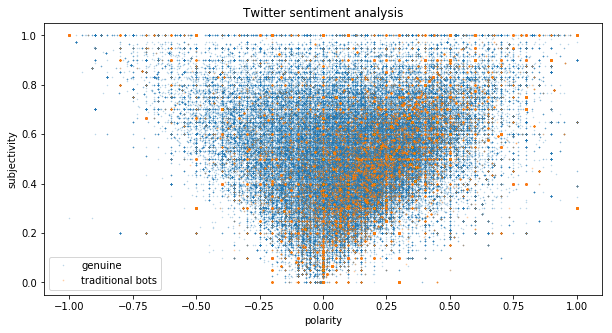

In [26]:
fig, ax = plt.subplots(1,1, figsize =(10,5))

ax.plot(gen_sent['polarity'].values, gen_sent['subjectivity'].values, 'o', markersize = 0.5, alpha = 0.3, label = 'genuine')
ax.plot(trad_bot1_sent['polarity'].values, trad_bot1_sent['subjectivity'].values, 'o', markersize = 0.7, alpha = 0.3, label ='traditional bots')
ax.set_xlabel('polarity')
ax.set_ylabel('subjectivity')
ax.set_title('Twitter sentiment analysis')
ax.legend()

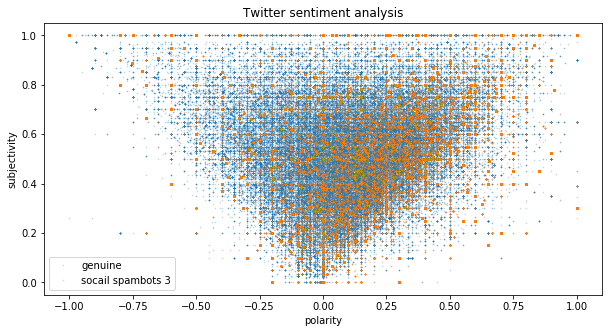

In [29]:
fig, ax = plt.subplots(1,1, figsize =(10,5))

ax.plot(gen_sent['polarity'].values, gen_sent['subjectivity'].values, 'o', markersize = 0.5, alpha = 0.3, label = 'genuine')
ax.plot(ss_bot3_sent['polarity'].values, ss_bot3_sent['subjectivity'].values, 'o', markersize = 0.7, alpha = 0.3, label ='socail spambots 3')
ax.set_xlabel('polarity')
ax.set_ylabel('subjectivity')
ax.set_title('Twitter sentiment analysis')
ax.legend()